In [1]:
import heeps
from heeps.wavefront.get_array import show_wf, get_wf
import os.path

## Create normalized pupil

Create pupil: spi_width=0.5 m, seg_width=1.45 m, seg_gap=0.004 m, seg_rms=0.03
   diam=36.905 m, resize to 285 pix, zero-pad to 1024 pix



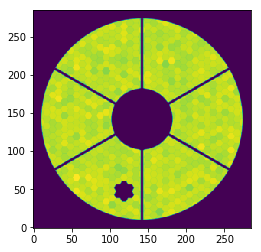

In [2]:
# select case: allglass, fullM1
case = 'allglass'#'fullM1'#
dir_current = '$HOME/INSTRUMENTS/METIS/heeps_analysis'
conf = dict(
    npupil = 285,
    norm_I = False,
    select_petal = None,
)
if case == 'allglass':
    conf.update(
        file_pupil = '',
        spi_width = 0.5,
        seg_width = 1.45,
        seg_gap = 0.004,
        seg_missing = [(-2,5),(-2,6),(-3,4),(-3,5),(-3,6),(-4,5),(-4,6)],
        seg_rms = 0.03,
    )
elif case == 'fullM1':
    conf.update(
        file_pupil = 'pupils/ELT_pupil_1385.fits',
    )
conf = heeps.config.read_config(verbose=False, **conf)
wf = heeps.pupil.pupil(verbose=True, **conf)
amp = show_wf(wf, 'amp', npupil=conf['npupil'])
fits.writeto(os.path.join(conf['dir_input'], 'pupils/pupil_%s_%s.fits'\
    %(case, conf['npupil'])), np.float32(amp), overwrite=True)

## Create petals


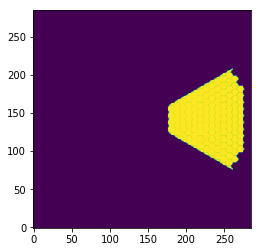

In [7]:
conf.update(
    seg_width = 0,
    seg_gap = 0,    
    norm_I = False,
)
for select_petal in range(6):
    conf['select_petal'] = select_petal
    wf = heeps.pupil.pupil(**conf)
    if select_petal == 0:
        amp = show_wf(wf, 'amp', npupil=conf['npupil'])
    else:
        amp = get_wf(wf, 'amp', npupil=conf['npupil'])
    fits.writeto(os.path.join(conf['dir_input'], 'pupil_petal%s_%s.fits'\
    %(select_petal, conf['npupil'])), np.float32(amp), overwrite=True)
